In [408]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
import categories

# import pillow

In [172]:
imsize = 64
annotation = pd.read_csv("train/Annotations/train.csv")

In [314]:
"""
预处理小于 512*512图片
pad 补丁让 图片 为512* 512
并且让更新坐标
宽度为 shapep[1] 高度为 shape[0]
"""

pre_path = "train_pad/"
intput_file_name = "Annotations/train.csv"
output_file_name = "Annotations/train_pad.csv"
#写入每张图片size
def write_img_size(df , file_dir ="train/"):
    #width : shape[0] height shape[1]
    size = pd.DataFrame(columns=["width" , "height"])
    max_width=10000
    max_height=10000
    min_width=0
    max_width=0
    for idx,row in df.iterrows():
        filepath_test = file_dir+row['image_id']
        img = Image.open(filepath_test)
        img = np.array(img)
        size.loc[idx]=[img.shape[0],img.shape[1]]
#         wid.set_value(id, img.shape[0])
#         height[idx] = img.shape[1]
    return size

def pad_img(np_img , size = 512):
    wid_diff = size-np_img.shape[1]
    height_diff = size - np_img.shape[0]
    left = int(wid_diff/2)
    right = size-left-np_img.shape[1]
    up = int(height_diff/2)
    down = size-up- np_img.shape[0]
    
    img_pad = np.pad(np_img , ((up,down),(left,right),(0,0)) , 'constant',constant_values=0)
    
    return img_pad,left,up


def pad_images(df,size = 512 , pre_path = 'train/'):
    
    l_m_columns = df.columns.drop(['image_id' , 'image_category'])
    for idx,row in df.iterrows():
        
        filepath = pre_path+row['image_id']
        img = Image.open(filepath)
        np_img = np.array(img)
        if np_img.shape[0] < size or np_img.shape[1] < size:
            print("need padding id: ",idx)
            (np_img,left,up) = pad_img(np_img , size)
            img = Image.fromarray(np_img, 'RGB')
#             img.save(str(idx)+".jpg")
            img.save(filepath)
            for col in l_m_columns:
                coord_list = row[col].split('_')
                coord_list = list(map(int,coord_list))
                
                if coord_list[0] != -1:
#                     print(coord_list)
                    #更新padding后的坐标
                    coord_list[0] +=left
                    coord_list[1] +=up
                    coord_list = list(map(str,coord_list))
                    coord_list = '_'.join(coord_list)
                    df.loc[idx,col] = coord_list
#                     print(coord_list)

    return df

data_small_eg = pd.read_csv(pre_path + intput_file_name)
data_small_pad = pad_images(data_small_eg,pre_path=pre_path)
data_small_pad.to_csv(pre_path + output_file_name,index=False)

need padding id:  1
12 12
6 6
(512, 512, 3)
need padding id:  3
65 65
32 32
(512, 512, 3)
need padding id:  6
129 0
64 0
(512, 512, 3)
need padding id:  27
20 0
10 0
(512, 512, 3)
need padding id:  33
103 0
51 0
(512, 512, 3)
need padding id:  35
128 0
64 0
(512, 512, 3)
need padding id:  38
171 0
85 0
(512, 512, 3)
need padding id:  44
0 3
0 1
(512, 512, 3)
need padding id:  52
12 0
6 0
(512, 512, 3)
need padding id:  60
112 112
56 56
(512, 512, 3)
need padding id:  71
232 0
116 0
(512, 512, 3)
need padding id:  74
171 0
85 0
(512, 512, 3)
need padding id:  76
25 0
12 0
(512, 512, 3)
need padding id:  77
171 0
85 0
(512, 512, 3)
need padding id:  87
32 0
16 0
(512, 512, 3)
need padding id:  91
147 0
73 0
(512, 512, 3)
need padding id:  96
182 17
91 8
(512, 512, 3)
need padding id:  106
171 0
85 0
(512, 512, 3)
need padding id:  121
128 1
64 0
(512, 512, 3)
need padding id:  131
171 0
85 0
(512, 512, 3)
need padding id:  138
0 62
0 31
(512, 512, 3)
need padding id:  140
179 68
89 34
(5

need padding id:  850
164 0
82 0
(512, 512, 3)
need padding id:  866
130 0
65 0
(512, 512, 3)
need padding id:  870
103 0
51 0
(512, 512, 3)
need padding id:  874
61 61
30 30
(512, 512, 3)
need padding id:  875
115 0
57 0
(512, 512, 3)
need padding id:  876
171 0
85 0
(512, 512, 3)
need padding id:  879
12 12
6 6
(512, 512, 3)
need padding id:  882
12 12
6 6
(512, 512, 3)
need padding id:  884
0 141
0 70
(512, 512, 3)
need padding id:  892
112 112
56 56
(512, 512, 3)
need padding id:  893
163 0
81 0
(512, 512, 3)
need padding id:  895
157 0
78 0
(512, 512, 3)
need padding id:  898
171 0
85 0
(512, 512, 3)
need padding id:  912
171 126
85 63
(512, 512, 3)
need padding id:  916
171 0
85 0
(512, 512, 3)
need padding id:  918
128 0
64 0
(512, 512, 3)
need padding id:  925
128 0
64 0
(512, 512, 3)
need padding id:  934
128 0
64 0
(512, 512, 3)
need padding id:  935
0 50
0 25
(512, 512, 3)
need padding id:  941
87 0
43 0
(512, 512, 3)
need padding id:  944
171 0
85 0
(512, 512, 3)
need paddi

(512, 512, 3)
need padding id:  1584
2 0
1 0
(512, 512, 3)
need padding id:  1586
144 0
72 0
(512, 512, 3)
need padding id:  1589
134 0
67 0
(512, 512, 3)
need padding id:  1590
0 1
0 0
(512, 512, 3)
need padding id:  1604
171 0
85 0
(512, 512, 3)
need padding id:  1608
52 52
26 26
(512, 512, 3)
need padding id:  1610
114 113
57 56
(512, 512, 3)
need padding id:  1613
78 78
39 39
(512, 512, 3)
need padding id:  1618
1 1
0 0
(512, 512, 3)
need padding id:  1623
171 0
85 0
(512, 512, 3)
need padding id:  1625
129 0
64 0
(512, 512, 3)
need padding id:  1626
0 1
0 0
(512, 512, 3)
need padding id:  1629
62 0
31 0
(512, 512, 3)
need padding id:  1631
0 128
0 64
(512, 512, 3)
need padding id:  1635
154 0
77 0
(512, 512, 3)
need padding id:  1640
0 1
0 0
(512, 512, 3)
need padding id:  1641
34 1
17 0
(512, 512, 3)
need padding id:  1650
179 0
89 0
(512, 512, 3)
need padding id:  1655
128 1
64 0
(512, 512, 3)
need padding id:  1659
153 0
76 0
(512, 512, 3)
need padding id:  1662
12 12
6 6
(512,

need padding id:  2362
1 1
0 0
(512, 512, 3)
need padding id:  2373
146 0
73 0
(512, 512, 3)
need padding id:  2375
171 0
85 0
(512, 512, 3)
need padding id:  2376
94 96
47 48
(512, 512, 3)
need padding id:  2383
0 3
0 1
(512, 512, 3)
need padding id:  2387
0 1
0 0
(512, 512, 3)
need padding id:  2388
171 0
85 0
(512, 512, 3)
need padding id:  2390
87 0
43 0
(512, 512, 3)
need padding id:  2409
0 1
0 0
(512, 512, 3)
need padding id:  2410
171 0
85 0
(512, 512, 3)
need padding id:  2414
0 2
0 1
(512, 512, 3)
need padding id:  2415
12 12
6 6
(512, 512, 3)
need padding id:  2422
1 104
0 52
(512, 512, 3)
need padding id:  2433
171 1
85 0
(512, 512, 3)
need padding id:  2434
48 0
24 0
(512, 512, 3)
need padding id:  2435
128 0
64 0
(512, 512, 3)
need padding id:  2436
128 0
64 0
(512, 512, 3)
need padding id:  2450
128 0
64 0
(512, 512, 3)
need padding id:  2455
0 171
0 85
(512, 512, 3)
need padding id:  2461
130 0
65 0
(512, 512, 3)
need padding id:  2464
0 52
0 26
(512, 512, 3)
need paddi

need padding id:  3142
129 0
64 0
(512, 512, 3)
need padding id:  3146
88 0
44 0
(512, 512, 3)
need padding id:  3148
0 128
0 64
(512, 512, 3)
need padding id:  3163
112 112
56 56
(512, 512, 3)
need padding id:  3164
171 0
85 0
(512, 512, 3)
need padding id:  3165
128 0
64 0
(512, 512, 3)
need padding id:  3179
0 24
0 12
(512, 512, 3)
need padding id:  3183
112 112
56 56
(512, 512, 3)
need padding id:  3191
128 0
64 0
(512, 512, 3)
need padding id:  3200
179 0
89 0
(512, 512, 3)
need padding id:  3206
128 0
64 0
(512, 512, 3)
need padding id:  3209
10 0
5 0
(512, 512, 3)
need padding id:  3211
143 0
71 0
(512, 512, 3)
need padding id:  3219
12 12
6 6
(512, 512, 3)
need padding id:  3221
108 0
54 0
(512, 512, 3)
need padding id:  3223
112 112
56 56
(512, 512, 3)
need padding id:  3224
94 54
47 27
(512, 512, 3)
need padding id:  3226
32 32
16 16
(512, 512, 3)
need padding id:  3227
124 0
62 0
(512, 512, 3)
need padding id:  3231
22 0
11 0
(512, 512, 3)
need padding id:  3235
114 0
57 0
(

need padding id:  3885
171 0
85 0
(512, 512, 3)
need padding id:  3886
12 12
6 6
(512, 512, 3)
need padding id:  3887
0 171
0 85
(512, 512, 3)
need padding id:  3892
171 0
85 0
(512, 512, 3)
need padding id:  3896
0 3
0 1
(512, 512, 3)
need padding id:  3898
1 161
0 80
(512, 512, 3)
need padding id:  3901
0 31
0 15
(512, 512, 3)
need padding id:  3914
171 0
85 0
(512, 512, 3)
need padding id:  3916
0 5
0 2
(512, 512, 3)
need padding id:  3930
72 0
36 0
(512, 512, 3)
need padding id:  3931
128 0
64 0
(512, 512, 3)
need padding id:  3933
128 0
64 0
(512, 512, 3)
need padding id:  3939
106 0
53 0
(512, 512, 3)
need padding id:  3944
0 9
0 4
(512, 512, 3)
need padding id:  3946
41 0
20 0
(512, 512, 3)
need padding id:  3953
2 2
1 1
(512, 512, 3)
need padding id:  3955
1 0
0 0
(512, 512, 3)
need padding id:  3962
112 112
56 56
(512, 512, 3)
need padding id:  3963
128 0
64 0
(512, 512, 3)
need padding id:  3969
95 0
47 0
(512, 512, 3)
need padding id:  3975
31 0
15 0
(512, 512, 3)
need paddi

(512, 512, 3)
need padding id:  4582
171 0
85 0
(512, 512, 3)
need padding id:  4592
171 0
85 0
(512, 512, 3)
need padding id:  4598
171 0
85 0
(512, 512, 3)
need padding id:  4601
91 1
45 0
(512, 512, 3)
need padding id:  4609
0 37
0 18
(512, 512, 3)
need padding id:  4611
0 1
0 0
(512, 512, 3)
need padding id:  4614
5 0
2 0
(512, 512, 3)
need padding id:  4616
61 1
30 0
(512, 512, 3)
need padding id:  4619
129 0
64 0
(512, 512, 3)
need padding id:  4622
171 0
85 0
(512, 512, 3)
need padding id:  4624
57 0
28 0
(512, 512, 3)
need padding id:  4628
121 0
60 0
(512, 512, 3)
need padding id:  4634
10 0
5 0
(512, 512, 3)
need padding id:  4641
47 0
23 0
(512, 512, 3)
need padding id:  4643
128 0
64 0
(512, 512, 3)
need padding id:  4644
128 0
64 0
(512, 512, 3)
need padding id:  4648
47 0
23 0
(512, 512, 3)
need padding id:  4649
128 0
64 0
(512, 512, 3)
need padding id:  4653
77 0
38 0
(512, 512, 3)
need padding id:  4654
112 112
56 56
(512, 512, 3)
need padding id:  4659
225 0
112 0
(51

(512, 512, 3)
need padding id:  5281
46 0
23 0
(512, 512, 3)
need padding id:  5285
159 1
79 0
(512, 512, 3)
need padding id:  5293
110 0
55 0
(512, 512, 3)
need padding id:  5294
129 0
64 0
(512, 512, 3)
need padding id:  5297
128 0
64 0
(512, 512, 3)
need padding id:  5298
130 0
65 0
(512, 512, 3)
need padding id:  5299
128 0
64 0
(512, 512, 3)
need padding id:  5306
73 0
36 0
(512, 512, 3)
need padding id:  5308
129 0
64 0
(512, 512, 3)
need padding id:  5310
171 0
85 0
(512, 512, 3)
need padding id:  5311
128 0
64 0
(512, 512, 3)
need padding id:  5317
0 143
0 71
(512, 512, 3)
need padding id:  5326
223 1
111 0
(512, 512, 3)
need padding id:  5334
35 0
17 0
(512, 512, 3)
need padding id:  5335
128 0
64 0
(512, 512, 3)
need padding id:  5339
128 0
64 0
(512, 512, 3)
need padding id:  5341
220 112
110 56
(512, 512, 3)
need padding id:  5346
128 0
64 0
(512, 512, 3)
need padding id:  5350
112 112
56 56
(512, 512, 3)
need padding id:  5357
25 0
12 0
(512, 512, 3)
need padding id:  5360

(512, 512, 3)
need padding id:  5970
128 0
64 0
(512, 512, 3)
need padding id:  5972
120 0
60 0
(512, 512, 3)
need padding id:  5974
143 0
71 0
(512, 512, 3)
need padding id:  5976
0 171
0 85
(512, 512, 3)
need padding id:  5978
234 112
117 56
(512, 512, 3)
need padding id:  5979
0 79
0 39
(512, 512, 3)
need padding id:  5982
179 0
89 0
(512, 512, 3)
need padding id:  5983
128 0
64 0
(512, 512, 3)
need padding id:  5987
99 0
49 0
(512, 512, 3)
need padding id:  6004
11 1
5 0
(512, 512, 3)
need padding id:  6006
81 0
40 0
(512, 512, 3)
need padding id:  6015
171 0
85 0
(512, 512, 3)
need padding id:  6018
5 0
2 0
(512, 512, 3)
need padding id:  6029
112 112
56 56
(512, 512, 3)
need padding id:  6030
128 0
64 0
(512, 512, 3)
need padding id:  6038
3 0
1 0
(512, 512, 3)
need padding id:  6041
0 87
0 43
(512, 512, 3)
need padding id:  6043
112 112
56 56
(512, 512, 3)
need padding id:  6044
51 0
25 0
(512, 512, 3)
need padding id:  6056
128 0
64 0
(512, 512, 3)
need padding id:  6072
128 0


need padding id:  6733
211 202
105 101
(512, 512, 3)
need padding id:  6737
43 0
21 0
(512, 512, 3)
need padding id:  6743
197 0
98 0
(512, 512, 3)
need padding id:  6746
52 52
26 26
(512, 512, 3)
need padding id:  6754
128 0
64 0
(512, 512, 3)
need padding id:  6759
96 80
48 40
(512, 512, 3)
need padding id:  6772
82 0
41 0
(512, 512, 3)
need padding id:  6782
76 0
38 0
(512, 512, 3)
need padding id:  6788
246 112
123 56
(512, 512, 3)
need padding id:  6790
0 2
0 1
(512, 512, 3)
need padding id:  6793
156 0
78 0
(512, 512, 3)
need padding id:  6805
128 0
64 0
(512, 512, 3)
need padding id:  6806
128 0
64 0
(512, 512, 3)
need padding id:  6817
0 53
0 26
(512, 512, 3)
need padding id:  6818
191 0
95 0
(512, 512, 3)
need padding id:  6819
230 0
115 0
(512, 512, 3)
need padding id:  6830
128 0
64 0
(512, 512, 3)
need padding id:  6837
132 0
66 0
(512, 512, 3)
need padding id:  6850
128 0
64 0
(512, 512, 3)
need padding id:  6851
246 112
123 56
(512, 512, 3)
need padding id:  6853
0 1
0 0


need padding id:  7396
147 0
73 0
(512, 512, 3)
need padding id:  7397
141 0
70 0
(512, 512, 3)
need padding id:  7398
171 0
85 0
(512, 512, 3)
need padding id:  7399
171 0
85 0
(512, 512, 3)
need padding id:  7402
171 0
85 0
(512, 512, 3)
need padding id:  7403
252 166
126 83
(512, 512, 3)
need padding id:  7404
150 1
75 0
(512, 512, 3)
need padding id:  7406
120 0
60 0
(512, 512, 3)
need padding id:  7409
171 0
85 0
(512, 512, 3)
need padding id:  7418
128 0
64 0
(512, 512, 3)
need padding id:  7419
124 0
62 0
(512, 512, 3)
need padding id:  7425
0 47
0 23
(512, 512, 3)
need padding id:  7427
12 12
6 6
(512, 512, 3)
need padding id:  7429
171 0
85 0
(512, 512, 3)
need padding id:  7432
63 0
31 0
(512, 512, 3)
need padding id:  7444
171 0
85 0
(512, 512, 3)
need padding id:  7452
181 0
90 0
(512, 512, 3)
need padding id:  7458
171 0
85 0
(512, 512, 3)
need padding id:  7461
108 0
54 0
(512, 512, 3)
need padding id:  7463
112 12
56 6
(512, 512, 3)
need padding id:  7465
12 12
6 6
(512,

need padding id:  7904
112 112
56 56
(512, 512, 3)
need padding id:  7906
172 0
86 0
(512, 512, 3)
need padding id:  7909
113 0
56 0
(512, 512, 3)
need padding id:  7910
86 0
43 0
(512, 512, 3)
need padding id:  7917
171 0
85 0
(512, 512, 3)
need padding id:  7924
23 1
11 0
(512, 512, 3)
need padding id:  7925
86 0
43 0
(512, 512, 3)
need padding id:  7927
1 1
0 0
(512, 512, 3)
need padding id:  7928
5 1
2 0
(512, 512, 3)
need padding id:  7930
82 82
41 41
(512, 512, 3)
need padding id:  7932
171 0
85 0
(512, 512, 3)
need padding id:  7933
171 0
85 0
(512, 512, 3)
need padding id:  7936
78 9
39 4
(512, 512, 3)
need padding id:  7938
19 1
9 0
(512, 512, 3)
need padding id:  7939
171 0
85 0
(512, 512, 3)
need padding id:  7942
21 0
10 0
(512, 512, 3)
need padding id:  7943
211 189
105 94
(512, 512, 3)
need padding id:  7944
76 0
38 0
(512, 512, 3)
need padding id:  7948
171 0
85 0
(512, 512, 3)
need padding id:  7949
171 0
85 0
(512, 512, 3)
need padding id:  7953
3 0
1 0
(512, 512, 3)
n

171 0
85 0
(512, 512, 3)
need padding id:  8405
171 0
85 0
(512, 512, 3)
need padding id:  8411
171 0
85 0
(512, 512, 3)
need padding id:  8415
195 0
97 0
(512, 512, 3)
need padding id:  8416
112 112
56 56
(512, 512, 3)
need padding id:  8418
133 0
66 0
(512, 512, 3)
need padding id:  8423
128 0
64 0
(512, 512, 3)
need padding id:  8425
93 0
46 0
(512, 512, 3)
need padding id:  8427
224 0
112 0
(512, 512, 3)
need padding id:  8433
128 0
64 0
(512, 512, 3)
need padding id:  8435
0 11
0 5
(512, 512, 3)
need padding id:  8436
129 0
64 0
(512, 512, 3)
need padding id:  8440
0 35
0 17
(512, 512, 3)
need padding id:  8445
0 128
0 64
(512, 512, 3)
need padding id:  8447
32 32
16 16
(512, 512, 3)
need padding id:  8452
105 0
52 0
(512, 512, 3)
need padding id:  8453
183 0
91 0
(512, 512, 3)
need padding id:  8455
111 0
55 0
(512, 512, 3)
need padding id:  8457
129 0
64 0
(512, 512, 3)
need padding id:  8461
129 0
64 0
(512, 512, 3)
need padding id:  8466
0 3
0 1
(512, 512, 3)
need padding id: 

need padding id:  8951
128 0
64 0
(512, 512, 3)
need padding id:  8952
171 0
85 0
(512, 512, 3)
need padding id:  8953
17 0
8 0
(512, 512, 3)
need padding id:  8956
1 0
0 0
(512, 512, 3)
need padding id:  8957
0 128
0 64
(512, 512, 3)
need padding id:  8959
12 12
6 6
(512, 512, 3)
need padding id:  8962
0 42
0 21
(512, 512, 3)
need padding id:  8964
38 162
19 81
(512, 512, 3)
need padding id:  8965
245 112
122 56
(512, 512, 3)
need padding id:  8967
180 0
90 0
(512, 512, 3)
need padding id:  8973
147 0
73 0
(512, 512, 3)
need padding id:  8975
171 0
85 0
(512, 512, 3)
need padding id:  8976
171 0
85 0
(512, 512, 3)
need padding id:  8978
146 0
73 0
(512, 512, 3)
need padding id:  8980
128 0
64 0
(512, 512, 3)
need padding id:  8984
161 0
80 0
(512, 512, 3)
need padding id:  8986
0 170
0 85
(512, 512, 3)
need padding id:  8989
146 0
73 0
(512, 512, 3)
need padding id:  8992
171 0
85 0
(512, 512, 3)
need padding id:  8995
0 171
0 85
(512, 512, 3)
need padding id:  8996
86 0
43 0
(512, 51

need padding id:  9393
86 0
43 0
(512, 512, 3)
need padding id:  9395
272 0
136 0
(512, 512, 3)
need padding id:  9402
137 133
68 66
(512, 512, 3)
need padding id:  9411
206 0
103 0
(512, 512, 3)
need padding id:  9414
128 0
64 0
(512, 512, 3)
need padding id:  9416
0 171
0 85
(512, 512, 3)
need padding id:  9418
133 0
66 0
(512, 512, 3)
need padding id:  9419
128 0
64 0
(512, 512, 3)
need padding id:  9420
171 0
85 0
(512, 512, 3)
need padding id:  9421
132 0
66 0
(512, 512, 3)
need padding id:  9426
60 0
30 0
(512, 512, 3)
need padding id:  9435
0 157
0 78
(512, 512, 3)
need padding id:  9443
171 0
85 0
(512, 512, 3)
need padding id:  9445
171 0
85 0
(512, 512, 3)
need padding id:  9453
95 1
47 0
(512, 512, 3)
need padding id:  9455
225 0
112 0
(512, 512, 3)
need padding id:  9459
202 204
101 102
(512, 512, 3)
need padding id:  9465
0 15
0 7
(512, 512, 3)
need padding id:  9466
34 0
17 0
(512, 512, 3)
need padding id:  9471
0 25
0 12
(512, 512, 3)
need padding id:  9472
171 0
85 0
(5

(512, 512, 3)
need padding id:  9888
0 222
0 111
(512, 512, 3)
need padding id:  9890
92 89
46 44
(512, 512, 3)
need padding id:  9892
0 162
0 81
(512, 512, 3)
need padding id:  9893
119 0
59 0
(512, 512, 3)
need padding id:  9896
202 99
101 49
(512, 512, 3)
need padding id:  9900
189 35
94 17
(512, 512, 3)
need padding id:  9901
128 0
64 0
(512, 512, 3)
need padding id:  9902
1 1
0 0
(512, 512, 3)
need padding id:  9903
1 1
0 0
(512, 512, 3)
need padding id:  9905
171 0
85 0
(512, 512, 3)
need padding id:  9909
171 0
85 0
(512, 512, 3)
need padding id:  9913
96 12
48 6
(512, 512, 3)
need padding id:  9915
171 0
85 0
(512, 512, 3)
need padding id:  9916
56 0
28 0
(512, 512, 3)
need padding id:  9922
171 0
85 0
(512, 512, 3)
need padding id:  9926
171 0
85 0
(512, 512, 3)
need padding id:  9930
202 0
101 0
(512, 512, 3)
need padding id:  9937
171 0
85 0
(512, 512, 3)
need padding id:  9942
128 0
64 0
(512, 512, 3)
need padding id:  9943
128 0
64 0
(512, 512, 3)
need padding id:  9945
19

(512, 512, 3)
need padding id:  10384
150 0
75 0
(512, 512, 3)
need padding id:  10389
60 0
30 0
(512, 512, 3)
need padding id:  10396
52 52
26 26
(512, 512, 3)
need padding id:  10400
0 26
0 13
(512, 512, 3)
need padding id:  10401
25 0
12 0
(512, 512, 3)
need padding id:  10403
171 0
85 0
(512, 512, 3)
need padding id:  10404
172 0
86 0
(512, 512, 3)
need padding id:  10406
62 62
31 31
(512, 512, 3)
need padding id:  10408
0 137
0 68
(512, 512, 3)
need padding id:  10412
128 0
64 0
(512, 512, 3)
need padding id:  10413
121 112
60 56
(512, 512, 3)
need padding id:  10415
172 0
86 0
(512, 512, 3)
need padding id:  10417
167 0
83 0
(512, 512, 3)
need padding id:  10418
0 1
0 0
(512, 512, 3)
need padding id:  10419
0 69
0 34
(512, 512, 3)
need padding id:  10420
128 1
64 0
(512, 512, 3)
need padding id:  10421
72 0
36 0
(512, 512, 3)
need padding id:  10422
0 129
0 64
(512, 512, 3)
need padding id:  10429
0 1
0 0
(512, 512, 3)
need padding id:  10435
128 0
64 0
(512, 512, 3)
need padding

need padding id:  10890
128 0
64 0
(512, 512, 3)
need padding id:  10893
171 0
85 0
(512, 512, 3)
need padding id:  10898
101 0
50 0
(512, 512, 3)
need padding id:  10902
128 0
64 0
(512, 512, 3)
need padding id:  10909
171 0
85 0
(512, 512, 3)
need padding id:  10911
171 0
85 0
(512, 512, 3)
need padding id:  10913
0 205
0 102
(512, 512, 3)
need padding id:  10917
171 0
85 0
(512, 512, 3)
need padding id:  10920
137 0
68 0
(512, 512, 3)
need padding id:  10922
0 171
0 85
(512, 512, 3)
need padding id:  10929
61 0
30 0
(512, 512, 3)
need padding id:  10930
128 0
64 0
(512, 512, 3)
need padding id:  10931
128 0
64 0
(512, 512, 3)
need padding id:  10932
128 0
64 0
(512, 512, 3)
need padding id:  10933
170 0
85 0
(512, 512, 3)
need padding id:  10936
0 31
0 15
(512, 512, 3)
need padding id:  10937
171 0
85 0
(512, 512, 3)
need padding id:  10941
128 0
64 0
(512, 512, 3)
need padding id:  10942
0 128
0 64
(512, 512, 3)
need padding id:  10943
82 204
41 102
(512, 512, 3)
need padding id:  

(512, 512, 3)
need padding id:  11427
0 74
0 37
(512, 512, 3)
need padding id:  11428
63 1
31 0
(512, 512, 3)
need padding id:  11429
128 0
64 0
(512, 512, 3)
need padding id:  11432
112 112
56 56
(512, 512, 3)
need padding id:  11437
2 0
1 0
(512, 512, 3)
need padding id:  11442
128 0
64 0
(512, 512, 3)
need padding id:  11444
10 0
5 0
(512, 512, 3)
need padding id:  11447
51 0
25 0
(512, 512, 3)
need padding id:  11448
171 0
85 0
(512, 512, 3)
need padding id:  11449
0 39
0 19
(512, 512, 3)
need padding id:  11451
0 27
0 13
(512, 512, 3)
need padding id:  11452
171 0
85 0
(512, 512, 3)
need padding id:  11456
0 22
0 11
(512, 512, 3)
need padding id:  11457
1 0
0 0
(512, 512, 3)
need padding id:  11458
107 0
53 0
(512, 512, 3)
need padding id:  11461
108 1
54 0
(512, 512, 3)
need padding id:  11463
142 0
71 0
(512, 512, 3)
need padding id:  11467
140 140
70 70
(512, 512, 3)
need padding id:  11468
165 0
82 0
(512, 512, 3)
need padding id:  11473
128 0
64 0
(512, 512, 3)
need padding i

need padding id:  11918
171 0
85 0
(512, 512, 3)
need padding id:  11922
128 0
64 0
(512, 512, 3)
need padding id:  11925
146 1
73 0
(512, 512, 3)
need padding id:  11926
172 0
86 0
(512, 512, 3)
need padding id:  11928
103 0
51 0
(512, 512, 3)
need padding id:  11931
171 0
85 0
(512, 512, 3)
need padding id:  11935
171 0
85 0
(512, 512, 3)
need padding id:  11936
112 112
56 56
(512, 512, 3)
need padding id:  11938
128 0
64 0
(512, 512, 3)
need padding id:  11940
32 32
16 16
(512, 512, 3)
need padding id:  11943
32 0
16 0
(512, 512, 3)
need padding id:  11946
172 0
86 0
(512, 512, 3)
need padding id:  11947
117 0
58 0
(512, 512, 3)
need padding id:  11948
98 0
49 0
(512, 512, 3)
need padding id:  11955
12 12
6 6
(512, 512, 3)
need padding id:  11956
171 0
85 0
(512, 512, 3)
need padding id:  11957
54 0
27 0
(512, 512, 3)
need padding id:  11958
12 12
6 6
(512, 512, 3)
need padding id:  11962
128 0
64 0
(512, 512, 3)
need padding id:  11964
12 1
6 0
(512, 512, 3)
need padding id:  11966

need padding id:  12421
207 0
103 0
(512, 512, 3)
need padding id:  12425
128 1
64 0
(512, 512, 3)
need padding id:  12426
0 50
0 25
(512, 512, 3)
need padding id:  12442
87 0
43 0
(512, 512, 3)
need padding id:  12444
0 103
0 51
(512, 512, 3)
need padding id:  12449
128 0
64 0
(512, 512, 3)
need padding id:  12452
130 0
65 0
(512, 512, 3)
need padding id:  12453
38 0
19 0
(512, 512, 3)
need padding id:  12455
92 0
46 0
(512, 512, 3)
need padding id:  12459
0 128
0 64
(512, 512, 3)
need padding id:  12463
171 0
85 0
(512, 512, 3)
need padding id:  12465
166 1
83 0
(512, 512, 3)
need padding id:  12466
0 172
0 86
(512, 512, 3)
need padding id:  12468
0 171
0 85
(512, 512, 3)
need padding id:  12470
0 153
0 76
(512, 512, 3)
need padding id:  12471
0 29
0 14
(512, 512, 3)
need padding id:  12473
128 0
64 0
(512, 512, 3)
need padding id:  12474
47 0
23 0
(512, 512, 3)
need padding id:  12477
171 0
85 0
(512, 512, 3)
need padding id:  12478
142 0
71 0
(512, 512, 3)
need padding id:  12484
2

need padding id:  12901
240 0
120 0
(512, 512, 3)
need padding id:  12911
171 0
85 0
(512, 512, 3)
need padding id:  12913
70 0
35 0
(512, 512, 3)
need padding id:  12924
128 0
64 0
(512, 512, 3)
need padding id:  12928
0 171
0 85
(512, 512, 3)
need padding id:  12929
7 53
3 26
(512, 512, 3)
need padding id:  12933
66 66
33 33
(512, 512, 3)
need padding id:  12935
171 0
85 0
(512, 512, 3)
need padding id:  12941
50 0
25 0
(512, 512, 3)
need padding id:  12942
255 0
127 0
(512, 512, 3)
need padding id:  12943
171 0
85 0
(512, 512, 3)
need padding id:  12945
128 1
64 0
(512, 512, 3)
need padding id:  12947
0 77
0 38
(512, 512, 3)
need padding id:  12948
0 128
0 64
(512, 512, 3)
need padding id:  12953
128 0
64 0
(512, 512, 3)
need padding id:  12954
128 0
64 0
(512, 512, 3)
need padding id:  12957
18 0
9 0
(512, 512, 3)
need padding id:  12962
182 28
91 14
(512, 512, 3)
need padding id:  12966
176 0
88 0
(512, 512, 3)
need padding id:  12970
122 0
61 0
(512, 512, 3)
need padding id:  129

need padding id:  13380
143 0
71 0
(512, 512, 3)
need padding id:  13381
37 0
18 0
(512, 512, 3)
need padding id:  13382
128 0
64 0
(512, 512, 3)
need padding id:  13384
2 0
1 0
(512, 512, 3)
need padding id:  13388
171 0
85 0
(512, 512, 3)
need padding id:  13392
171 0
85 0
(512, 512, 3)
need padding id:  13400
12 12
6 6
(512, 512, 3)
need padding id:  13406
128 0
64 0
(512, 512, 3)
need padding id:  13407
0 63
0 31
(512, 512, 3)
need padding id:  13409
0 129
0 64
(512, 512, 3)
need padding id:  13413
62 62
31 31
(512, 512, 3)
need padding id:  13414
115 0
57 0
(512, 512, 3)
need padding id:  13415
128 0
64 0
(512, 512, 3)
need padding id:  13419
171 0
85 0
(512, 512, 3)
need padding id:  13424
129 1
64 0
(512, 512, 3)
need padding id:  13426
129 0
64 0
(512, 512, 3)
need padding id:  13428
171 0
85 0
(512, 512, 3)
need padding id:  13429
180 0
90 0
(512, 512, 3)
need padding id:  13434
231 0
115 0
(512, 512, 3)
need padding id:  13439
33 0
16 0
(512, 512, 3)
need padding id:  13444
2

need padding id:  13907
173 1
86 0
(512, 512, 3)
need padding id:  13908
33 0
16 0
(512, 512, 3)
need padding id:  13910
0 128
0 64
(512, 512, 3)
need padding id:  13911
60 1
30 0
(512, 512, 3)
need padding id:  13914
0 182
0 91
(512, 512, 3)
need padding id:  13916
85 0
42 0
(512, 512, 3)
need padding id:  13923
0 56
0 28
(512, 512, 3)
need padding id:  13924
107 0
53 0
(512, 512, 3)
need padding id:  13925
0 158
0 79
(512, 512, 3)
need padding id:  13930
144 0
72 0
(512, 512, 3)
need padding id:  13933
80 0
40 0
(512, 512, 3)
need padding id:  13934
182 1
91 0
(512, 512, 3)
need padding id:  13935
171 0
85 0
(512, 512, 3)
need padding id:  13937
128 0
64 0
(512, 512, 3)
need padding id:  13943
171 0
85 0
(512, 512, 3)
need padding id:  13946
89 0
44 0
(512, 512, 3)
need padding id:  13948
84 0
42 0
(512, 512, 3)
need padding id:  13949
141 0
70 0
(512, 512, 3)
need padding id:  13950
120 1
60 0
(512, 512, 3)
need padding id:  13958
131 0
65 0
(512, 512, 3)
need padding id:  13962
128

(512, 512, 3)
need padding id:  14441
142 42
71 21
(512, 512, 3)
need padding id:  14444
128 0
64 0
(512, 512, 3)
need padding id:  14449
171 0
85 0
(512, 512, 3)
need padding id:  14454
128 0
64 0
(512, 512, 3)
need padding id:  14456
128 0
64 0
(512, 512, 3)
need padding id:  14457
150 0
75 0
(512, 512, 3)
need padding id:  14458
128 0
64 0
(512, 512, 3)
need padding id:  14468
88 0
44 0
(512, 512, 3)
need padding id:  14472
103 0
51 0
(512, 512, 3)
need padding id:  14477
106 0
53 0
(512, 512, 3)
need padding id:  14480
140 0
70 0
(512, 512, 3)
need padding id:  14484
0 41
0 20
(512, 512, 3)
need padding id:  14492
128 0
64 0
(512, 512, 3)
need padding id:  14493
23 0
11 0
(512, 512, 3)
need padding id:  14494
0 7
0 3
(512, 512, 3)
need padding id:  14495
128 0
64 0
(512, 512, 3)
need padding id:  14500
129 0
64 0
(512, 512, 3)
need padding id:  14504
0 32
0 16
(512, 512, 3)
need padding id:  14505
172 0
86 0
(512, 512, 3)
need padding id:  14508
177 0
88 0
(512, 512, 3)
need paddin

(512, 512, 3)
need padding id:  14975
128 0
64 0
(512, 512, 3)
need padding id:  14976
171 0
85 0
(512, 512, 3)
need padding id:  14977
0 103
0 51
(512, 512, 3)
need padding id:  14978
112 112
56 56
(512, 512, 3)
need padding id:  14981
0 6
0 3
(512, 512, 3)
need padding id:  14982
128 0
64 0
(512, 512, 3)
need padding id:  14983
0 91
0 45
(512, 512, 3)
need padding id:  14986
171 0
85 0
(512, 512, 3)
need padding id:  14990
113 112
56 56
(512, 512, 3)
need padding id:  14992
128 0
64 0
(512, 512, 3)
need padding id:  14995
171 0
85 0
(512, 512, 3)
need padding id:  14997
41 0
20 0
(512, 512, 3)
need padding id:  15001
12 12
6 6
(512, 512, 3)
need padding id:  15009
144 0
72 0
(512, 512, 3)
need padding id:  15017
0 8
0 4
(512, 512, 3)
need padding id:  15018
52 52
26 26
(512, 512, 3)
need padding id:  15022
171 0
85 0
(512, 512, 3)
need padding id:  15024
36 0
18 0
(512, 512, 3)
need padding id:  15026
112 112
56 56
(512, 512, 3)
need padding id:  15030
128 0
64 0
(512, 512, 3)
need p

(512, 512, 3)
need padding id:  15485
112 112
56 56
(512, 512, 3)
need padding id:  15486
128 0
64 0
(512, 512, 3)
need padding id:  15488
129 0
64 0
(512, 512, 3)
need padding id:  15495
61 0
30 0
(512, 512, 3)
need padding id:  15496
8 0
4 0
(512, 512, 3)
need padding id:  15498
171 0
85 0
(512, 512, 3)
need padding id:  15501
197 0
98 0
(512, 512, 3)
need padding id:  15502
187 0
93 0
(512, 512, 3)
need padding id:  15514
128 0
64 0
(512, 512, 3)
need padding id:  15515
170 0
85 0
(512, 512, 3)
need padding id:  15528
0 171
0 85
(512, 512, 3)
need padding id:  15534
151 0
75 0
(512, 512, 3)
need padding id:  15535
61 1
30 0
(512, 512, 3)
need padding id:  15538
171 0
85 0
(512, 512, 3)
need padding id:  15553
171 0
85 0
(512, 512, 3)
need padding id:  15558
170 0
85 0
(512, 512, 3)
need padding id:  15559
7 0
3 0
(512, 512, 3)
need padding id:  15562
171 0
85 0
(512, 512, 3)
need padding id:  15563
32 32
16 16
(512, 512, 3)
need padding id:  15564
186 0
93 0
(512, 512, 3)
need paddi

(512, 512, 3)
need padding id:  16174
152 80
76 40
(512, 512, 3)
need padding id:  16176
171 0
85 0
(512, 512, 3)
need padding id:  16178
171 0
85 0
(512, 512, 3)
need padding id:  16182
107 0
53 0
(512, 512, 3)
need padding id:  16187
171 0
85 0
(512, 512, 3)
need padding id:  16215
17 0
8 0
(512, 512, 3)
need padding id:  16216
20 0
10 0
(512, 512, 3)
need padding id:  16222
165 1
82 0
(512, 512, 3)
need padding id:  16223
180 0
90 0
(512, 512, 3)
need padding id:  16225
117 0
58 0
(512, 512, 3)
need padding id:  16242
171 0
85 0
(512, 512, 3)
need padding id:  16244
96 0
48 0
(512, 512, 3)
need padding id:  16247
128 1
64 0
(512, 512, 3)
need padding id:  16255
5 0
2 0
(512, 512, 3)
need padding id:  16259
16 1
8 0
(512, 512, 3)
need padding id:  16261
171 0
85 0
(512, 512, 3)
need padding id:  16274
171 0
85 0
(512, 512, 3)
need padding id:  16277
192 0
96 0
(512, 512, 3)
need padding id:  16286
152 0
76 0
(512, 512, 3)
need padding id:  16287
0 1
0 0
(512, 512, 3)
need padding id:

(512, 512, 3)
need padding id:  16859
171 0
85 0
(512, 512, 3)
need padding id:  16865
171 0
85 0
(512, 512, 3)
need padding id:  16867
0 3
0 1
(512, 512, 3)
need padding id:  16868
171 0
85 0
(512, 512, 3)
need padding id:  16873
171 0
85 0
(512, 512, 3)
need padding id:  16875
52 52
26 26
(512, 512, 3)
need padding id:  16878
141 0
70 0
(512, 512, 3)
need padding id:  16879
187 0
93 0
(512, 512, 3)
need padding id:  16889
175 0
87 0
(512, 512, 3)
need padding id:  16900
171 0
85 0
(512, 512, 3)
need padding id:  16901
171 0
85 0
(512, 512, 3)
need padding id:  16903
171 0
85 0
(512, 512, 3)
need padding id:  16907
192 0
96 0
(512, 512, 3)
need padding id:  16909
128 0
64 0
(512, 512, 3)
need padding id:  16922
171 0
85 0
(512, 512, 3)
need padding id:  16924
0 2
0 1
(512, 512, 3)
need padding id:  16927
21 1
10 0
(512, 512, 3)
need padding id:  16930
128 0
64 0
(512, 512, 3)
need padding id:  16931
171 0
85 0
(512, 512, 3)
need padding id:  16933
112 0
56 0
(512, 512, 3)
need padding

(512, 512, 3)
need padding id:  17522
90 0
45 0
(512, 512, 3)
need padding id:  17523
171 0
85 0
(512, 512, 3)
need padding id:  17525
171 0
85 0
(512, 512, 3)
need padding id:  17527
171 0
85 0
(512, 512, 3)
need padding id:  17528
131 0
65 0
(512, 512, 3)
need padding id:  17529
45 0
22 0
(512, 512, 3)
need padding id:  17530
28 0
14 0
(512, 512, 3)
need padding id:  17531
128 0
64 0
(512, 512, 3)
need padding id:  17532
224 0
112 0
(512, 512, 3)
need padding id:  17543
0 169
0 84
(512, 512, 3)
need padding id:  17545
52 0
26 0
(512, 512, 3)
need padding id:  17548
128 0
64 0
(512, 512, 3)
need padding id:  17550
99 0
49 0
(512, 512, 3)
need padding id:  17552
129 0
64 0
(512, 512, 3)
need padding id:  17554
171 0
85 0
(512, 512, 3)
need padding id:  17556
245 112
122 56
(512, 512, 3)
need padding id:  17558
171 0
85 0
(512, 512, 3)
need padding id:  17564
171 0
85 0
(512, 512, 3)
need padding id:  17565
0 1
0 0
(512, 512, 3)
need padding id:  17566
171 0
85 0
(512, 512, 3)
need padd

(512, 512, 3)
need padding id:  18046
1 1
0 0
(512, 512, 3)
need padding id:  18051
1 0
0 0
(512, 512, 3)
need padding id:  18056
139 0
69 0
(512, 512, 3)
need padding id:  18058
148 0
74 0
(512, 512, 3)
need padding id:  18064
171 0
85 0
(512, 512, 3)
need padding id:  18065
173 0
86 0
(512, 512, 3)
need padding id:  18067
128 0
64 0
(512, 512, 3)
need padding id:  18068
128 0
64 0
(512, 512, 3)
need padding id:  18078
171 0
85 0
(512, 512, 3)
need padding id:  18079
62 0
31 0
(512, 512, 3)
need padding id:  18084
171 0
85 0
(512, 512, 3)
need padding id:  18087
171 0
85 0
(512, 512, 3)
need padding id:  18088
128 0
64 0
(512, 512, 3)
need padding id:  18092
128 0
64 0
(512, 512, 3)
need padding id:  18095
128 0
64 0
(512, 512, 3)
need padding id:  18096
128 0
64 0
(512, 512, 3)
need padding id:  18106
171 0
85 0
(512, 512, 3)
need padding id:  18112
128 0
64 0
(512, 512, 3)
need padding id:  18113
171 0
85 0
(512, 512, 3)
need padding id:  18122
171 0
85 0
(512, 512, 3)
need padding 

need padding id:  18636
157 157
78 78
(512, 512, 3)
need padding id:  18637
170 0
85 0
(512, 512, 3)
need padding id:  18638
225 0
112 0
(512, 512, 3)
need padding id:  18639
128 0
64 0
(512, 512, 3)
need padding id:  18642
129 0
64 0
(512, 512, 3)
need padding id:  18648
130 0
65 0
(512, 512, 3)
need padding id:  18649
12 12
6 6
(512, 512, 3)
need padding id:  18652
128 0
64 0
(512, 512, 3)
need padding id:  18654
171 0
85 0
(512, 512, 3)
need padding id:  18656
171 0
85 0
(512, 512, 3)
need padding id:  18657
128 0
64 0
(512, 512, 3)
need padding id:  18663
92 0
46 0
(512, 512, 3)
need padding id:  18665
60 0
30 0
(512, 512, 3)
need padding id:  18666
171 0
85 0
(512, 512, 3)
need padding id:  18667
153 0
76 0
(512, 512, 3)
need padding id:  18670
171 0
85 0
(512, 512, 3)
need padding id:  18671
144 0
72 0
(512, 512, 3)
need padding id:  18672
3 0
1 0
(512, 512, 3)
need padding id:  18674
2 1
1 0
(512, 512, 3)
need padding id:  18675
128 0
64 0
(512, 512, 3)
need padding id:  18676
1

(512, 512, 3)
need padding id:  19078
124 0
62 0
(512, 512, 3)
need padding id:  19081
128 0
64 0
(512, 512, 3)
need padding id:  19084
205 0
102 0
(512, 512, 3)
need padding id:  19089
99 1
49 0
(512, 512, 3)
need padding id:  19091
113 0
56 0
(512, 512, 3)
need padding id:  19095
128 0
64 0
(512, 512, 3)
need padding id:  19098
174 0
87 0
(512, 512, 3)
need padding id:  19100
158 0
79 0
(512, 512, 3)
need padding id:  19108
128 0
64 0
(512, 512, 3)
need padding id:  19109
128 0
64 0
(512, 512, 3)
need padding id:  19113
13 0
6 0
(512, 512, 3)
need padding id:  19117
0 1
0 0
(512, 512, 3)
need padding id:  19119
128 0
64 0
(512, 512, 3)
need padding id:  19121
0 25
0 12
(512, 512, 3)
need padding id:  19124
112 112
56 56
(512, 512, 3)
need padding id:  19125
171 0
85 0
(512, 512, 3)
need padding id:  19131
109 0
54 0
(512, 512, 3)
need padding id:  19132
171 0
85 0
(512, 512, 3)
need padding id:  19133
128 0
64 0
(512, 512, 3)
need padding id:  19138
156 0
78 0
(512, 512, 3)
need padd

need padding id:  19594
129 0
64 0
(512, 512, 3)
need padding id:  19595
128 0
64 0
(512, 512, 3)
need padding id:  19596
127 0
63 0
(512, 512, 3)
need padding id:  19597
128 0
64 0
(512, 512, 3)
need padding id:  19599
31 0
15 0
(512, 512, 3)
need padding id:  19603
128 0
64 0
(512, 512, 3)
need padding id:  19609
84 0
42 0
(512, 512, 3)
need padding id:  19613
128 0
64 0
(512, 512, 3)
need padding id:  19614
4 0
2 0
(512, 512, 3)
need padding id:  19617
12 12
6 6
(512, 512, 3)
need padding id:  19619
0 148
0 74
(512, 512, 3)
need padding id:  19623
225 0
112 0
(512, 512, 3)
need padding id:  19624
128 0
64 0
(512, 512, 3)
need padding id:  19625
149 0
74 0
(512, 512, 3)
need padding id:  19629
172 0
86 0
(512, 512, 3)
need padding id:  19631
162 0
81 0
(512, 512, 3)
need padding id:  19633
172 0
86 0
(512, 512, 3)
need padding id:  19645
146 1
73 0
(512, 512, 3)
need padding id:  19646
91 1
45 0
(512, 512, 3)
need padding id:  19650
171 0
85 0
(512, 512, 3)
need padding id:  19651
12

need padding id:  20039
205 0
102 0
(512, 512, 3)
need padding id:  20041
171 0
85 0
(512, 512, 3)
need padding id:  20045
171 0
85 0
(512, 512, 3)
need padding id:  20050
171 0
85 0
(512, 512, 3)
need padding id:  20058
146 1
73 0
(512, 512, 3)
need padding id:  20062
129 0
64 0
(512, 512, 3)
need padding id:  20065
148 0
74 0
(512, 512, 3)
need padding id:  20072
171 0
85 0
(512, 512, 3)
need padding id:  20073
171 0
85 0
(512, 512, 3)
need padding id:  20074
1 0
0 0
(512, 512, 3)
need padding id:  20075
111 0
55 0
(512, 512, 3)
need padding id:  20078
0 4
0 2
(512, 512, 3)
need padding id:  20087
0 88
0 44
(512, 512, 3)
need padding id:  20091
0 198
0 99
(512, 512, 3)
need padding id:  20096
128 0
64 0
(512, 512, 3)
need padding id:  20100
171 0
85 0
(512, 512, 3)
need padding id:  20101
128 0
64 0
(512, 512, 3)
need padding id:  20103
135 0
67 0
(512, 512, 3)
need padding id:  20108
171 0
85 0
(512, 512, 3)
need padding id:  20114
112 112
56 56
(512, 512, 3)
need padding id:  20117

(512, 512, 3)
need padding id:  20610
123 113
61 56
(512, 512, 3)
need padding id:  20611
0 3
0 1
(512, 512, 3)
need padding id:  20612
57 0
28 0
(512, 512, 3)
need padding id:  20614
140 0
70 0
(512, 512, 3)
need padding id:  20624
172 0
86 0
(512, 512, 3)
need padding id:  20628
171 1
85 0
(512, 512, 3)
need padding id:  20631
204 0
102 0
(512, 512, 3)
need padding id:  20635
16 0
8 0
(512, 512, 3)
need padding id:  20640
39 0
19 0
(512, 512, 3)
need padding id:  20644
114 115
57 57
(512, 512, 3)
need padding id:  20651
245 112
122 56
(512, 512, 3)
need padding id:  20662
169 0
84 0
(512, 512, 3)
need padding id:  20669
171 0
85 0
(512, 512, 3)
need padding id:  20679
12 12
6 6
(512, 512, 3)
need padding id:  20688
97 1
48 0
(512, 512, 3)
need padding id:  20690
171 0
85 0
(512, 512, 3)
need padding id:  20693
26 0
13 0
(512, 512, 3)
need padding id:  20694
103 0
51 0
(512, 512, 3)
need padding id:  20699
0 55
0 27
(512, 512, 3)
need padding id:  20702
125 0
62 0
(512, 512, 3)
need p

need padding id:  21209
119 0
59 0
(512, 512, 3)
need padding id:  21210
0 171
0 85
(512, 512, 3)
need padding id:  21215
0 17
0 8
(512, 512, 3)
need padding id:  21216
208 0
104 0
(512, 512, 3)
need padding id:  21217
192 0
96 0
(512, 512, 3)
need padding id:  21225
0 171
0 85
(512, 512, 3)
need padding id:  21226
171 0
85 0
(512, 512, 3)
need padding id:  21230
112 112
56 56
(512, 512, 3)
need padding id:  21231
171 0
85 0
(512, 512, 3)
need padding id:  21240
187 117
93 58
(512, 512, 3)
need padding id:  21241
149 0
74 0
(512, 512, 3)
need padding id:  21247
128 0
64 0
(512, 512, 3)
need padding id:  21253
53 54
26 27
(512, 512, 3)
need padding id:  21254
171 0
85 0
(512, 512, 3)
need padding id:  21256
206 205
103 102
(512, 512, 3)
need padding id:  21263
196 0
98 0
(512, 512, 3)
need padding id:  21265
5 0
2 0
(512, 512, 3)
need padding id:  21283
138 1
69 0
(512, 512, 3)
need padding id:  21287
12 12
6 6
(512, 512, 3)
need padding id:  21293
119 0
59 0
(512, 512, 3)
need padding 

(512, 512, 3)
need padding id:  21870
0 8
0 4
(512, 512, 3)
need padding id:  21874
224 0
112 0
(512, 512, 3)
need padding id:  21877
0 171
0 85
(512, 512, 3)
need padding id:  21881
171 0
85 0
(512, 512, 3)
need padding id:  21893
0 171
0 85
(512, 512, 3)
need padding id:  21894
1 1
0 0
(512, 512, 3)
need padding id:  21899
128 0
64 0
(512, 512, 3)
need padding id:  21901
128 0
64 0
(512, 512, 3)
need padding id:  21904
128 0
64 0
(512, 512, 3)
need padding id:  21905
1 0
0 0
(512, 512, 3)
need padding id:  21906
196 0
98 0
(512, 512, 3)
need padding id:  21909
128 1
64 0
(512, 512, 3)
need padding id:  21911
128 0
64 0
(512, 512, 3)
need padding id:  21914
191 0
95 0
(512, 512, 3)
need padding id:  21915
9 0
4 0
(512, 512, 3)
need padding id:  21916
129 0
64 0
(512, 512, 3)
need padding id:  21920
95 0
47 0
(512, 512, 3)
need padding id:  21923
45 0
22 0
(512, 512, 3)
need padding id:  21926
129 0
64 0
(512, 512, 3)
need padding id:  21928
60 0
30 0
(512, 512, 3)
need padding id:  21

need padding id:  22423
111 0
55 0
(512, 512, 3)
need padding id:  22433
171 0
85 0
(512, 512, 3)
need padding id:  22434
29 0
14 0
(512, 512, 3)
need padding id:  22443
171 0
85 0
(512, 512, 3)
need padding id:  22444
32 32
16 16
(512, 512, 3)
need padding id:  22454
119 0
59 0
(512, 512, 3)
need padding id:  22456
4 0
2 0
(512, 512, 3)
need padding id:  22458
146 0
73 0
(512, 512, 3)
need padding id:  22459
82 82
41 41
(512, 512, 3)
need padding id:  22460
171 0
85 0
(512, 512, 3)
need padding id:  22462
171 0
85 0
(512, 512, 3)
need padding id:  22463
171 0
85 0
(512, 512, 3)
need padding id:  22469
61 1
30 0
(512, 512, 3)
need padding id:  22470
0 169
0 84
(512, 512, 3)
need padding id:  22473
60 0
30 0
(512, 512, 3)
need padding id:  22475
58 0
29 0
(512, 512, 3)
need padding id:  22483
173 1
86 0
(512, 512, 3)
need padding id:  22484
0 124
0 62
(512, 512, 3)
need padding id:  22486
33 0
16 0
(512, 512, 3)
need padding id:  22489
172 0
86 0
(512, 512, 3)
need padding id:  22492
59

need padding id:  22993
128 0
64 0
(512, 512, 3)
need padding id:  22994
128 0
64 0
(512, 512, 3)
need padding id:  22997
161 0
80 0
(512, 512, 3)
need padding id:  23000
163 0
81 0
(512, 512, 3)
need padding id:  23003
169 0
84 0
(512, 512, 3)
need padding id:  23004
12 12
6 6
(512, 512, 3)
need padding id:  23012
171 0
85 0
(512, 512, 3)
need padding id:  23013
126 0
63 0
(512, 512, 3)
need padding id:  23015
128 0
64 0
(512, 512, 3)
need padding id:  23020
128 0
64 0
(512, 512, 3)
need padding id:  23021
103 0
51 0
(512, 512, 3)
need padding id:  23024
129 0
64 0
(512, 512, 3)
need padding id:  23030
129 0
64 0
(512, 512, 3)
need padding id:  23032
171 0
85 0
(512, 512, 3)
need padding id:  23035
112 112
56 56
(512, 512, 3)
need padding id:  23036
122 132
61 66
(512, 512, 3)
need padding id:  23039
102 0
51 0
(512, 512, 3)
need padding id:  23040
112 112
56 56
(512, 512, 3)
need padding id:  23043
112 112
56 56
(512, 512, 3)
need padding id:  23046
128 0
64 0
(512, 512, 3)
need padd

(512, 512, 3)
need padding id:  23526
128 0
64 0
(512, 512, 3)
need padding id:  23530
86 0
43 0
(512, 512, 3)
need padding id:  23531
56 0
28 0
(512, 512, 3)
need padding id:  23533
28 0
14 0
(512, 512, 3)
need padding id:  23535
128 0
64 0
(512, 512, 3)
need padding id:  23536
128 0
64 0
(512, 512, 3)
need padding id:  23540
128 0
64 0
(512, 512, 3)
need padding id:  23541
171 0
85 0
(512, 512, 3)
need padding id:  23554
128 0
64 0
(512, 512, 3)
need padding id:  23555
171 0
85 0
(512, 512, 3)
need padding id:  23558
0 24
0 12
(512, 512, 3)
need padding id:  23559
232 0
116 0
(512, 512, 3)
need padding id:  23560
103 0
51 0
(512, 512, 3)
need padding id:  23561
147 0
73 0
(512, 512, 3)
need padding id:  23570
128 0
64 0
(512, 512, 3)
need padding id:  23571
225 0
112 0
(512, 512, 3)
need padding id:  23574
128 0
64 0
(512, 512, 3)
need padding id:  23575
122 103
61 51
(512, 512, 3)
need padding id:  23579
135 0
67 0
(512, 512, 3)
need padding id:  23583
60 0
30 0
(512, 512, 3)
need p

need padding id:  24050
119 0
59 0
(512, 512, 3)
need padding id:  24051
224 0
112 0
(512, 512, 3)
need padding id:  24052
140 0
70 0
(512, 512, 3)
need padding id:  24053
86 0
43 0
(512, 512, 3)
need padding id:  24067
12 12
6 6
(512, 512, 3)
need padding id:  24068
171 0
85 0
(512, 512, 3)
need padding id:  24071
171 0
85 0
(512, 512, 3)
need padding id:  24074
213 0
106 0
(512, 512, 3)
need padding id:  24078
43 0
21 0
(512, 512, 3)
need padding id:  24079
171 0
85 0
(512, 512, 3)
need padding id:  24081
153 0
76 0
(512, 512, 3)
need padding id:  24082
86 0
43 0
(512, 512, 3)
need padding id:  24085
172 0
86 0
(512, 512, 3)
need padding id:  24086
22 0
11 0
(512, 512, 3)
need padding id:  24087
128 0
64 0
(512, 512, 3)
need padding id:  24088
166 0
83 0
(512, 512, 3)
need padding id:  24089
1 1
0 0
(512, 512, 3)
need padding id:  24090
2 0
1 0
(512, 512, 3)
need padding id:  24094
128 0
64 0
(512, 512, 3)
need padding id:  24096
21 0
10 0
(512, 512, 3)
need padding id:  24099
165 0


need padding id:  24627
60 0
30 0
(512, 512, 3)
need padding id:  24633
0 171
0 85
(512, 512, 3)
need padding id:  24634
119 0
59 0
(512, 512, 3)
need padding id:  24635
128 0
64 0
(512, 512, 3)
need padding id:  24636
128 0
64 0
(512, 512, 3)
need padding id:  24639
128 0
64 0
(512, 512, 3)
need padding id:  24641
112 112
56 56
(512, 512, 3)
need padding id:  24642
112 112
56 56
(512, 512, 3)
need padding id:  24643
171 0
85 0
(512, 512, 3)
need padding id:  24644
202 203
101 101
(512, 512, 3)
need padding id:  24648
92 0
46 0
(512, 512, 3)
need padding id:  24650
152 0
76 0
(512, 512, 3)
need padding id:  24656
142 0
71 0
(512, 512, 3)
need padding id:  24657
107 0
53 0
(512, 512, 3)
need padding id:  24658
229 1
114 0
(512, 512, 3)
need padding id:  24663
0 174
0 87
(512, 512, 3)
need padding id:  24668
137 0
68 0
(512, 512, 3)
need padding id:  24674
172 0
86 0
(512, 512, 3)
need padding id:  24686
171 0
85 0
(512, 512, 3)
need padding id:  24689
194 182
97 91
(512, 512, 3)
need pa

need padding id:  25305
171 0
85 0
(512, 512, 3)
need padding id:  25306
171 0
85 0
(512, 512, 3)
need padding id:  25310
246 113
123 56
(512, 512, 3)
need padding id:  25316
171 0
85 0
(512, 512, 3)
need padding id:  25317
192 0
96 0
(512, 512, 3)
need padding id:  25318
171 0
85 0
(512, 512, 3)
need padding id:  25319
151 0
75 0
(512, 512, 3)
need padding id:  25321
171 0
85 0
(512, 512, 3)
need padding id:  25323
171 0
85 0
(512, 512, 3)
need padding id:  25325
171 0
85 0
(512, 512, 3)
need padding id:  25327
171 0
85 0
(512, 512, 3)
need padding id:  25339
40 0
20 0
(512, 512, 3)
need padding id:  25342
171 0
85 0
(512, 512, 3)
need padding id:  25344
171 0
85 0
(512, 512, 3)
need padding id:  25346
162 0
81 0
(512, 512, 3)
need padding id:  25347
28 1
14 0
(512, 512, 3)
need padding id:  25350
121 0
60 0
(512, 512, 3)
need padding id:  25354
1 0
0 0
(512, 512, 3)
need padding id:  25357
171 0
85 0
(512, 512, 3)
need padding id:  25359
147 0
73 0
(512, 512, 3)
need padding id:  253

(512, 512, 3)
need padding id:  25728
124 0
62 0
(512, 512, 3)
need padding id:  25729
171 0
85 0
(512, 512, 3)
need padding id:  25732
171 0
85 0
(512, 512, 3)
need padding id:  25736
171 0
85 0
(512, 512, 3)
need padding id:  25738
146 0
73 0
(512, 512, 3)
need padding id:  25740
171 0
85 0
(512, 512, 3)
need padding id:  25742
182 17
91 8
(512, 512, 3)
need padding id:  25743
171 0
85 0
(512, 512, 3)
need padding id:  25744
1 0
0 0
(512, 512, 3)
need padding id:  25745
190 0
95 0
(512, 512, 3)
need padding id:  25746
117 0
58 0
(512, 512, 3)
need padding id:  25747
112 112
56 56
(512, 512, 3)
need padding id:  25748
128 0
64 0
(512, 512, 3)
need padding id:  25749
128 0
64 0
(512, 512, 3)
need padding id:  25751
146 0
73 0
(512, 512, 3)
need padding id:  25752
171 0
85 0
(512, 512, 3)
need padding id:  25754
187 1
93 0
(512, 512, 3)
need padding id:  25755
171 0
85 0
(512, 512, 3)
need padding id:  25766
141 0
70 0
(512, 512, 3)
need padding id:  25767
128 0
64 0
(512, 512, 3)
need 

need padding id:  26130
78 0
39 0
(512, 512, 3)
need padding id:  26132
211 58
105 29
(512, 512, 3)
need padding id:  26133
171 0
85 0
(512, 512, 3)
need padding id:  26138
111 0
55 0
(512, 512, 3)
need padding id:  26140
171 0
85 0
(512, 512, 3)
need padding id:  26145
168 0
84 0
(512, 512, 3)
need padding id:  26146
0 13
0 6
(512, 512, 3)
need padding id:  26148
121 1
60 0
(512, 512, 3)
need padding id:  26149
171 0
85 0
(512, 512, 3)
need padding id:  26150
171 0
85 0
(512, 512, 3)
need padding id:  26154
0 16
0 8
(512, 512, 3)
need padding id:  26155
0 17
0 8
(512, 512, 3)
need padding id:  26156
171 0
85 0
(512, 512, 3)
need padding id:  26157
136 0
68 0
(512, 512, 3)
need padding id:  26158
190 0
95 0
(512, 512, 3)
need padding id:  26162
172 0
86 0
(512, 512, 3)
need padding id:  26164
172 0
86 0
(512, 512, 3)
need padding id:  26166
46 1
23 0
(512, 512, 3)
need padding id:  26167
130 0
65 0
(512, 512, 3)
need padding id:  26168
128 1
64 0
(512, 512, 3)
need padding id:  26170
1

need padding id:  26599
128 0
64 0
(512, 512, 3)
need padding id:  26600
0 22
0 11
(512, 512, 3)
need padding id:  26611
297 0
148 0
(512, 512, 3)
need padding id:  26614
0 172
0 86
(512, 512, 3)
need padding id:  26616
136 0
68 0
(512, 512, 3)
need padding id:  26618
0 101
0 50
(512, 512, 3)
need padding id:  26619
128 0
64 0
(512, 512, 3)
need padding id:  26621
0 83
0 41
(512, 512, 3)
need padding id:  26622
283 0
141 0
(512, 512, 3)
need padding id:  26627
128 0
64 0
(512, 512, 3)
need padding id:  26630
125 0
62 0
(512, 512, 3)
need padding id:  26631
128 0
64 0
(512, 512, 3)
need padding id:  26632
128 0
64 0
(512, 512, 3)
need padding id:  26635
171 0
85 0
(512, 512, 3)
need padding id:  26636
224 0
112 0
(512, 512, 3)
need padding id:  26637
128 1
64 0
(512, 512, 3)
need padding id:  26640
128 0
64 0
(512, 512, 3)
need padding id:  26642
0 128
0 64
(512, 512, 3)
need padding id:  26644
128 0
64 0
(512, 512, 3)
need padding id:  26651
171 0
85 0
(512, 512, 3)
need padding id:  2

(512, 512, 3)
need padding id:  27093
155 0
77 0
(512, 512, 3)
need padding id:  27095
128 0
64 0
(512, 512, 3)
need padding id:  27096
171 0
85 0
(512, 512, 3)
need padding id:  27100
171 0
85 0
(512, 512, 3)
need padding id:  27102
0 33
0 16
(512, 512, 3)
need padding id:  27104
171 0
85 0
(512, 512, 3)
need padding id:  27112
128 0
64 0
(512, 512, 3)
need padding id:  27113
145 0
72 0
(512, 512, 3)
need padding id:  27118
73 0
36 0
(512, 512, 3)
need padding id:  27119
128 0
64 0
(512, 512, 3)
need padding id:  27122
128 0
64 0
(512, 512, 3)
need padding id:  27124
53 0
26 0
(512, 512, 3)
need padding id:  27127
128 0
64 0
(512, 512, 3)
need padding id:  27130
171 0
85 0
(512, 512, 3)
need padding id:  27131
0 186
0 93
(512, 512, 3)
need padding id:  27132
0 128
0 64
(512, 512, 3)
need padding id:  27133
146 0
73 0
(512, 512, 3)
need padding id:  27138
0 129
0 64
(512, 512, 3)
need padding id:  27139
0 128
0 64
(512, 512, 3)
need padding id:  27140
224 0
112 0
(512, 512, 3)
need pad

need padding id:  27610
0 132
0 66
(512, 512, 3)
need padding id:  27611
108 0
54 0
(512, 512, 3)
need padding id:  27613
61 1
30 0
(512, 512, 3)
need padding id:  27615
171 0
85 0
(512, 512, 3)
need padding id:  27616
192 0
96 0
(512, 512, 3)
need padding id:  27624
128 0
64 0
(512, 512, 3)
need padding id:  27627
128 0
64 0
(512, 512, 3)
need padding id:  27628
0 60
0 30
(512, 512, 3)
need padding id:  27630
0 128
0 64
(512, 512, 3)
need padding id:  27631
192 0
96 0
(512, 512, 3)
need padding id:  27632
58 43
29 21
(512, 512, 3)
need padding id:  27635
0 173
0 86
(512, 512, 3)
need padding id:  27637
128 0
64 0
(512, 512, 3)
need padding id:  27644
218 0
109 0
(512, 512, 3)
need padding id:  27645
128 0
64 0
(512, 512, 3)
need padding id:  27649
13 0
6 0
(512, 512, 3)
need padding id:  27650
0 109
0 54
(512, 512, 3)
need padding id:  27651
10 0
5 0
(512, 512, 3)
need padding id:  27652
72 57
36 28
(512, 512, 3)
need padding id:  27662
52 52
26 26
(512, 512, 3)
need padding id:  2766

need padding id:  28165
133 0
66 0
(512, 512, 3)
need padding id:  28172
128 0
64 0
(512, 512, 3)
need padding id:  28173
133 0
66 0
(512, 512, 3)
need padding id:  28176
62 61
31 30
(512, 512, 3)
need padding id:  28178
129 1
64 0
(512, 512, 3)
need padding id:  28184
0 32
0 16
(512, 512, 3)
need padding id:  28188
128 0
64 0
(512, 512, 3)
need padding id:  28189
178 0
89 0
(512, 512, 3)
need padding id:  28190
137 112
68 56
(512, 512, 3)
need padding id:  28196
133 0
66 0
(512, 512, 3)
need padding id:  28205
78 43
39 21
(512, 512, 3)
need padding id:  28206
112 176
56 88
(512, 512, 3)
need padding id:  28208
201 0
100 0
(512, 512, 3)
need padding id:  28210
128 0
64 0
(512, 512, 3)
need padding id:  28213
128 0
64 0
(512, 512, 3)
need padding id:  28214
225 0
112 0
(512, 512, 3)
need padding id:  28216
202 202
101 101
(512, 512, 3)
need padding id:  28219
128 0
64 0
(512, 512, 3)
need padding id:  28220
48 0
24 0
(512, 512, 3)
need padding id:  28222
27 0
13 0
(512, 512, 3)
need pad

need padding id:  28705
171 0
85 0
(512, 512, 3)
need padding id:  28712
172 0
86 0
(512, 512, 3)
need padding id:  28718
0 59
0 29
(512, 512, 3)
need padding id:  28723
127 0
63 0
(512, 512, 3)
need padding id:  28724
8 0
4 0
(512, 512, 3)
need padding id:  28735
7 0
3 0
(512, 512, 3)
need padding id:  28736
171 0
85 0
(512, 512, 3)
need padding id:  28737
13 0
6 0
(512, 512, 3)
need padding id:  28739
157 0
78 0
(512, 512, 3)
need padding id:  28741
206 52
103 26
(512, 512, 3)
need padding id:  28743
4 0
2 0
(512, 512, 3)
need padding id:  28744
0 1
0 0
(512, 512, 3)
need padding id:  28745
65 0
32 0
(512, 512, 3)
need padding id:  28756
0 171
0 85
(512, 512, 3)
need padding id:  28757
28 0
14 0
(512, 512, 3)
need padding id:  28758
172 0
86 0
(512, 512, 3)
need padding id:  28759
212 0
106 0
(512, 512, 3)
need padding id:  28761
125 0
62 0
(512, 512, 3)
need padding id:  28763
230 0
115 0
(512, 512, 3)
need padding id:  28764
185 0
92 0
(512, 512, 3)
need padding id:  28765
181 0
90

(512, 512, 3)
need padding id:  29173
1 0
0 0
(512, 512, 3)
need padding id:  29175
171 0
85 0
(512, 512, 3)
need padding id:  29177
128 0
64 0
(512, 512, 3)
need padding id:  29178
171 0
85 0
(512, 512, 3)
need padding id:  29183
0 183
0 91
(512, 512, 3)
need padding id:  29185
87 0
43 0
(512, 512, 3)
need padding id:  29187
128 0
64 0
(512, 512, 3)
need padding id:  29189
128 0
64 0
(512, 512, 3)
need padding id:  29192
128 1
64 0
(512, 512, 3)
need padding id:  29199
171 0
85 0
(512, 512, 3)
need padding id:  29200
167 0
83 0
(512, 512, 3)
need padding id:  29205
26 1
13 0
(512, 512, 3)
need padding id:  29208
171 0
85 0
(512, 512, 3)
need padding id:  29209
171 0
85 0
(512, 512, 3)
need padding id:  29213
111 0
55 0
(512, 512, 3)
need padding id:  29214
128 0
64 0
(512, 512, 3)
need padding id:  29216
0 171
0 85
(512, 512, 3)
need padding id:  29218
51 0
25 0
(512, 512, 3)
need padding id:  29219
0 92
0 46
(512, 512, 3)
need padding id:  29220
171 0
85 0
(512, 512, 3)
need padding 

(512, 512, 3)
need padding id:  29706
50 0
25 0
(512, 512, 3)
need padding id:  29707
172 0
86 0
(512, 512, 3)
need padding id:  29708
101 1
50 0
(512, 512, 3)
need padding id:  29709
170 0
85 0
(512, 512, 3)
need padding id:  29710
41 0
20 0
(512, 512, 3)
need padding id:  29714
103 0
51 0
(512, 512, 3)
need padding id:  29720
156 0
78 0
(512, 512, 3)
need padding id:  29723
127 0
63 0
(512, 512, 3)
need padding id:  29724
171 0
85 0
(512, 512, 3)
need padding id:  29726
160 0
80 0
(512, 512, 3)
need padding id:  29727
206 0
103 0
(512, 512, 3)
need padding id:  29732
76 0
38 0
(512, 512, 3)
need padding id:  29734
128 0
64 0
(512, 512, 3)
need padding id:  29735
100 0
50 0
(512, 512, 3)
need padding id:  29736
171 0
85 0
(512, 512, 3)
need padding id:  29737
28 0
14 0
(512, 512, 3)
need padding id:  29738
171 0
85 0
(512, 512, 3)
need padding id:  29740
107 0
53 0
(512, 512, 3)
need padding id:  29741
113 0
56 0
(512, 512, 3)
need padding id:  29744
147 0
73 0
(512, 512, 3)
need padd

(512, 512, 3)
need padding id:  30221
128 0
64 0
(512, 512, 3)
need padding id:  30224
69 0
34 0
(512, 512, 3)
need padding id:  30226
128 0
64 0
(512, 512, 3)
need padding id:  30233
107 0
53 0
(512, 512, 3)
need padding id:  30238
128 0
64 0
(512, 512, 3)
need padding id:  30240
218 0
109 0
(512, 512, 3)
need padding id:  30241
61 0
30 0
(512, 512, 3)
need padding id:  30244
209 0
104 0
(512, 512, 3)
need padding id:  30245
128 0
64 0
(512, 512, 3)
need padding id:  30246
103 0
51 0
(512, 512, 3)
need padding id:  30247
171 0
85 0
(512, 512, 3)
need padding id:  30248
3 0
1 0
(512, 512, 3)
need padding id:  30254
128 0
64 0
(512, 512, 3)
need padding id:  30256
123 0
61 0
(512, 512, 3)
need padding id:  30258
172 0
86 0
(512, 512, 3)
need padding id:  30262
171 0
85 0
(512, 512, 3)
need padding id:  30263
128 0
64 0
(512, 512, 3)
need padding id:  30264
69 0
34 0
(512, 512, 3)
need padding id:  30266
171 0
85 0
(512, 512, 3)
need padding id:  30271
32 0
16 0
(512, 512, 3)
need paddin

need padding id:  30650
0 2
0 1
(512, 512, 3)
need padding id:  30656
16 0
8 0
(512, 512, 3)
need padding id:  30657
171 0
85 0
(512, 512, 3)
need padding id:  30658
128 0
64 0
(512, 512, 3)
need padding id:  30661
171 0
85 0
(512, 512, 3)
need padding id:  30662
131 132
65 66
(512, 512, 3)
need padding id:  30666
171 0
85 0
(512, 512, 3)
need padding id:  30668
219 149
109 74
(512, 512, 3)
need padding id:  30671
0 114
0 57
(512, 512, 3)
need padding id:  30675
176 0
88 0
(512, 512, 3)
need padding id:  30679
171 0
85 0
(512, 512, 3)
need padding id:  30681
187 0
93 0
(512, 512, 3)
need padding id:  30688
171 0
85 0
(512, 512, 3)
need padding id:  30692
224 0
112 0
(512, 512, 3)
need padding id:  30693
152 0
76 0
(512, 512, 3)
need padding id:  30694
103 0
51 0
(512, 512, 3)
need padding id:  30695
103 0
51 0
(512, 512, 3)
need padding id:  30696
8 0
4 0
(512, 512, 3)
need padding id:  30699
5 0
2 0
(512, 512, 3)
need padding id:  30700
16 0
8 0
(512, 512, 3)
need padding id:  30701
2

6 6
(512, 512, 3)
need padding id:  31107
171 0
85 0
(512, 512, 3)
need padding id:  31108
0 80
0 40
(512, 512, 3)
need padding id:  31112
154 0
77 0
(512, 512, 3)
need padding id:  31115
171 0
85 0
(512, 512, 3)
need padding id:  31116
42 0
21 0
(512, 512, 3)
need padding id:  31118
185 0
92 0
(512, 512, 3)
need padding id:  31121
172 0
86 0
(512, 512, 3)
need padding id:  31122
258 1
129 0
(512, 512, 3)
need padding id:  31124
171 0
85 0
(512, 512, 3)
need padding id:  31125
119 0
59 0
(512, 512, 3)
need padding id:  31126
219 0
109 0
(512, 512, 3)
need padding id:  31127
103 0
51 0
(512, 512, 3)
need padding id:  31134
97 0
48 0
(512, 512, 3)
need padding id:  31137
71 0
35 0
(512, 512, 3)
need padding id:  31139
171 0
85 0
(512, 512, 3)
need padding id:  31140
32 0
16 0
(512, 512, 3)
need padding id:  31146
128 0
64 0
(512, 512, 3)
need padding id:  31148
128 0
64 0
(512, 512, 3)
need padding id:  31151
129 0
64 0
(512, 512, 3)
need padding id:  31154
115 114
57 57
(512, 512, 3)
ne

(512, 512, 3)
need padding id:  31551
12 12
6 6
(512, 512, 3)
need padding id:  31552
107 0
53 0
(512, 512, 3)
need padding id:  31556
171 0
85 0
(512, 512, 3)
need padding id:  31557
159 0
79 0
(512, 512, 3)
need padding id:  31559
0 171
0 85
(512, 512, 3)
need padding id:  31560
171 0
85 0
(512, 512, 3)
need padding id:  31562
171 0
85 0
(512, 512, 3)
need padding id:  31563
171 0
85 0
(512, 512, 3)
need padding id:  31564
172 0
86 0
(512, 512, 3)
need padding id:  31569
171 0
85 0
(512, 512, 3)
need padding id:  31573
12 12
6 6
(512, 512, 3)
need padding id:  31574
101 0
50 0
(512, 512, 3)
need padding id:  31576
89 0
44 0
(512, 512, 3)
need padding id:  31578
128 0
64 0
(512, 512, 3)
need padding id:  31579
15 62
7 31
(512, 512, 3)
need padding id:  31581
128 0
64 0
(512, 512, 3)
need padding id:  31584
171 0
85 0
(512, 512, 3)
need padding id:  31594
88 0
44 0
(512, 512, 3)
need padding id:  31596
171 0
85 0
(512, 512, 3)
need padding id:  31603
12 12
6 6
(512, 512, 3)
need paddin

In [325]:
"""
将数据分类别
"""

pre_path = "train_pad/"
intput_file_name =  "Annotations/train_pad.csv"


#通过不同的类型写入
def write_with_category(df , is_train=True , pre_path="train/"):
    write_path = pre_path+"Annotations/train_"
    categories = df.image_category.unique()
    for category in categories:
        df_new = df.loc[df.image_category==category,:]
        df_new.to_csv(write_path+category+".csv",index =False)
        
        
data_pad = pd.read_csv(pre_path + intput_file_name)
write_with_category(data_pad,pre_path=pre_path)




In [409]:
"""
将数据分隔为x y visbile
"""
cates = ["blouse" ,"outwear","trousers","skirt","dress" ]
pre_path = "train_pad/"
#输入原来数据结构
#输出分解后的坐标
def split_coord(df ,cate, output_path):
    columns = df.columns
    if "height" in columns or "width" in columns:
        l_m_columns = columns.drop(['image_id' , 'image_category','height','width'])
    else:
        l_m_columns = columns.drop(['image_id' , 'image_category'])
    cols = categories.get_columns(idx)
    for col in cols:
        coord_list = df[col].str.split('_')
        #if int(coord_list[0][1]) != -1:
        df[[col+"_x" , col+"_y", col+"_vis"]] = pd.DataFrame(coord_list.tolist(), index= df.index)
    df = df.drop(l_m_columns,axis=1)
    df.to_csv( output_path, index = False)
    return df
for idx,cate in enumerate(cates):
    intput_file =  "Annotations/train_"+cate+".csv"
    output_coord_file = pre_path +"Annotations/train_"+cate+"_coord.csv"
    
    data_blouse = pd.read_csv(pre_path + intput_file)
    data_blouse_coord = split_coord(data_blouse,idx,output_coord_file)



In [448]:
"""
按不同类型读图片，
并生成为：
x (m, 宽*高*3)
y (m,关键点*3)
"""
pre_path = "train_pad/"
intput_blouse_file =  "Annotations/train_blouse_coord.csv"

#x (m, 宽*高*3)
def set_x_one_hot(df , scale = 1 , folder =  'train/'):
    filepath_test = folder+df.loc[0,'image_id']
    img = Image.open(filepath_test)
    np_img = np.array(img)
    img = img.resize((int(np_img.shape[1]/scale),int(np_img.shape[0]/scale)))
    x_all =np.expand_dims( np.array(img).reshape((-1)) , axis=0)
    size= df.shape[0]  
    
    for idx,row in df.iterrows():
        filepath_test =folder+row['image_id']
        img = Image.open(filepath_test)
        np_img = np.array(img)
        
        img = img.resize((int(np_img.shape[1]/scale),int(np_img.shape[0]/scale)))
        np_img = np.array(img)
        np_img = np_img.reshape((-1))
        #print(np_img.shape)
#         np.concatenate(x_all,np.array(new_img))
        x_all = np.append(x_all,np.expand_dims(np_img,axis=0),axis=0)
#     print(x_all.shape)
#     x_all=x_all.reshape((size,-1))
#     print(x_all.shape)
#     np.savetxt('images.txt' , x_all)
    return x_all[1:]

# y (m,关键点*3)
def set_y_coord(df,scale = 1):
    columns = df.columns
    if "height" in columns or "width" in columns:
        l_m_columns = columns.drop(['image_id' , 'image_category','height','width'])
    else:
        l_m_columns = columns.drop(['image_id' , 'image_category'])
    y_coord = df[l_m_columns].as_matrix()

    y_coord[:,np.arange(0,y_coord.shape[1],3)] = y_coord[:,np.arange(0,y_coord.shape[1],3)]/scale
    y_coord[:,np.arange(1,y_coord.shape[1],3)] = y_coord[:,np.arange(1,y_coord.shape[1],3)]/scale
    
    l_m_index = np.append(np.arange(0,y_coord.shape[1],3), np.arange(1,y_coord.shape[1],3) )
    l_m_index = np.sort(l_m_index)
    vis_index = np.arange(2,y_coord.shape[1],3)

#     print(np.sort(l_m_index))
    
    # Whether has landmark point
    has_lm_data = y_coord[:,vis_index]
    has_lm_data[has_lm_data==0]=1
    has_lm_data[has_lm_data==-1]=0

    # Whether is visible
    is_vis_data = y_coord[:,vis_index]
    is_vis_data[np.logical_or( is_vis_data ==-1 , is_vis_data==0 )]=0
    
    print (y_coord[:,l_m_index].shape ,has_lm_data.shape , is_vis_data.shape)
    return_array = np.concatenate((y_coord[:,l_m_index],has_lm_data , is_vis_data),axis=1)
    return return_array
    return y_coord[:,l_m_index]

def set_image_name(df):
    return df.loc[:,['image_id' , 'image_category']].as_matrix()
    

data_blouse_coord = pd.read_csv(pre_path + intput_blouse_file)
small_data_blouse_coord = data_blouse_coord.loc[0:9,:] 
x_train = set_x_one_hot(small_data_blouse_coord, 8, pre_path)

y_train = set_y_coord(small_data_blouse_coord  , 1)



print(x_train.shape , y_train.shape,name_train.shape)
y_train[7,:]

# #make small data for 整合各式：
# name_train = set_image_name(small_data_blouse_coord)
# np.append(name_train,y_train,axis=1).shape
# pd.DataFrame(np.append(name_train,y_train,axis=1)).to_csv("test_coord.csv" , index = False)

(10, 26) (10, 13) (10, 13)
(10, 12288) (10, 52) (10, 2)


array([229,  34, 301,  30, 261,  48, 181,  64, 351,  35, 198, 151, 364,
       145, 167, 347, 128, 347, 299,   7,  -1,  -1, 178, 281, 368, 279,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   0,   1,   1,
         1,   0,   1,   1,   0,   0,   1,   1,   1,   1,   0,   0,   1],
      dtype=int64)

# 以下为测试

numpy.ndarray

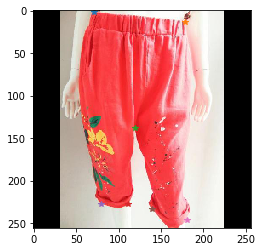

In [376]:

data_pad = pd.read_csv(pre_path + output_file_name)
show_im_lms(data_pad,28172,2,pre_dir=pre_path)


In [323]:

#helper function:

def show_im_lms(df,index,scale=1 , pre_dir = 'train/'):
    #show landmarks
    columns = df.columns
    l_m_columns = columns.drop(['image_id' , 'image_category'])
    for col in l_m_columns:
        coord = df.loc[index,col]
        coord=coord.split('_')
        #change the string into integer
        coord = list(map(float, coord))
        if coord[0]!=-1:
            x=coord[0]/scale
            y=coord[1]/scale
            plt.plot(x,y,'*')
            
    filepath = pre_dir+df.loc[index,'image_id']
    img = Image.open(filepath)
    width = int(np.array(img).shape[1]/scale)
    height = int(np.array(img).shape[0]/scale)
    img = img.resize((width,height))
    plt.imshow(img)
    
def make_small_df(df , size =99):
    category_size = {}
    for idx,cate in enumerate(df.image_category.unique()):
        category_size[cate] = df.loc[df['image_category'] == cate,:].shape[0]
    
    df_result = df.loc[:size,:]
    beg=0
    for name,value in category_size.items():
        #print(name,value)
        beg+=value
        if beg>df.shape[0]:
            break
        df_result=pd.concat([df_result,df.loc[beg:beg+size,:]])
    return df_result.reset_index()
"""

x_onehot (m, wid*height*3)
"""    
def set_y(df):
    #create category encoding
    category_encode = {}
    category_size = {}
    category_array={}
    for idx,cate in enumerate(df.image_category.unique()):
        category_encode[cate] =idx
        category_size[cate] = df.loc[df['image_category'] == cate,:].shape[0]
        #map the category with encoding.
        category_array[cate] = df.loc[df['image_category'] == cate,'image_category'].map(category_encode).as_matrix()
    y_cate = df.image_category
    y_cate=y_cate.map(category_encode)
    return y_cate
"""

x_onehot (m, wid*height*3)
"""  



##########################################






def set_x_one_hot(df , im_size = 128):
    filepath_test = 'train/'+df.loc[0,'image_id']
    img = Image.open(filepath_test)

    new_img = img.resize((im_size,im_size))
    x_all =np.expand_dims( np.array(new_img).reshape((-1)) , axis=0)
    size= df.shape[0]  
    
    for idx,row in df.iterrows():
        filepath_test = 'train/'+row['image_id']
        img = Image.open(filepath_test)
        np_img = np.array(img)
        if np_img.shape[0]!= 512 or np_img.shape[1]!= 512:
            pad_img(np_img)
        
        new_img = img.resize((im_size,im_size))
        np_img = np.array(new_img)
        np_img = np_img.reshape((-1))
        #print(np_img.shape)
#         np.concatenate(x_all,np.array(new_img))
        x_all = np.append(x_all,np.expand_dims(np_img,axis=0),axis=0)
#     print(x_all.shape)
#     x_all=x_all.reshape((size,-1))
#     print(x_all.shape)
#     np.savetxt('images.txt' , x_all)
    return x_all[1:]
#     x_all=x_all.reshape((size,im_size,im_size,3))
#     print(x_all.shape)
#     np.savetxt('images.txt' , x_all)
    #plt.imshow(new_img)
    #np.array(new_img).shape





def update_coord(df,idx, size = 512):
    filepath_test = 'train/'+df.loc[idx,'image_id']
    img = Image.open(filepath_test)
    img = np.array(img)
    
    wid_diff = size-img.shape[0]
    height_diff = size - img.shape[1]
    left = int(wid_diff/2)
    up = int(height_diff/2)
    
    df = df.loc[idx,df.columns.drop(['image_id' , 'image_category','width','height'])]
    
    columns = df.columns
    col_size = columns.shape[0]
    df[columns[np.arange(0,col_size,3)]] = df[columns[np.arange(0,col_size,3)]]+left
    df[columns[np.arange(1,col_size,3)]] = df[columns[np.arange(1,col_size,3)]]+up
    
    print(df[columns[np.arange(0,col_size,3)]].shape)
    return df



    

def get_x_y(df,df_size,scale=1):
    df=df[:df_size]
    
    x=set_x_one_hot(df,imsize)
    y=set_y_coord(data_train_blouse_split)

In [187]:
#将图片size加入数据结构
train_data = pd.read_csv("train/Annotations/train.csv")
train_size = pd.read_csv("train_size.csv")
train_data[["width" ,"height"]] = train_size[["width" ,"height"]]
train_data.to_csv("train/Annotations/train_with_size.csv",index =False)


test_data= pd.read_csv("test/test.csv")
test_size = pd.read_csv("test_size.csv")
test_data[["width" ,"height"]] = test_size[["width" ,"height"]]
test_data.to_csv("test/test_with_size.csv",index =False)



In [188]:
write_with_category(train_data)

In [200]:
#write blouse的坐标系
data_train_blouse = pd.read_csv("train/Annotations/train_blouse.csv")
data_train_blouse = clean_columns(data_train_blouse,1)
data_train_blouse_split = split_coord(data_train_blouse)
data_train_blouse_split.to_csv("train/Annotations/train_blouse_coord.csv" , index = False)

In [232]:
set_x_one_hot(data_train_blouse_split[:100]).shape
# set_y_coord(data_train_blouse_split)

(100, 49152)

In [240]:
update_coord(data_train_blouse_split,1)

AttributeError: 'Series' object has no attribute 'columns'

In [231]:
# x_all  = np.array([])
# set_x_one_hot(annotation).
small_df = make_small_df(annotation)
x_one_hot = set_x_one_hot(small_df,imsize)


In [266]:
y_cate = set_y(small_df)
y_cate.shape
y_cate=pd.get_dummies(y_cate).as_matrix()


In [267]:
import sklearn.model_selection as sk

X_train, X_test, y_train, y_test = sk.train_test_split(x_one_hot,y_cate,test_size=0.33, random_state = 42)
X_train.shape
y_train.shape

(335, 5)

In [251]:
enc = OneHotEncoder()
enc.fit([[1,2,3]])

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [44]:
filepath_test = 'train/'+annotation.loc[0,'image_id']

print(annotation.shape)
annotation.head()
# type(annotation)

l_m_columns = columns.drop(['image_id' , 'image_category'])
test = annotation.loc[0,l_m_columns]
print(test.shape)
test.str.split('_')
type(test.str.split('_').as_matrix())
test.str.split('_').as_matrix()

(31631, 26)


NameError: name 'columns' is not defined

In [45]:
im = imageio.imread(filepath_test)

512


<function Image.resize>

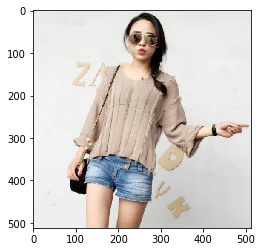

In [46]:
print(im.shape[0])
plt.imshow(im)
im.resize

In [47]:
min_wid = 600
min_len = 600
for idx ,row in annotation.iterrows():
    filepath_test = 'train/'+row['image_id']
    im = imageio.imread(filepath_test)
    min_wid = min(min_wid,im.shape[0])
    min_len = min(min_len,im.shape[1])
print(min_wid , min_len)

KeyboardInterrupt: 

(612, 612, 3)

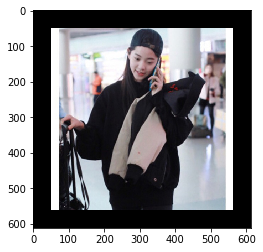

In [242]:
#resize image

img = Image.open(filepath_test)
# new_img = img.resize((1700,200))

img.save("a.jpg")
# plt.imshow(new_img)
img = np.array(img)
img.shape

img_pad = np.pad(img , ((50,50),(50,50),(0,0)) , 'constant')
plt.imshow(img_pad)
img_pad.shape


In [356]:
img = Image.open("a.png")
np.array(img).shape

(257, 221)